In [79]:
from pycap import PropertyTree, CyclicVoltammetry
import sys
sys.path.append('/notebooks')
from battery import Dualfoil
from matplotlib import pyplot
from pycap import initialize_data, plot_data
from pickle import dump, load
import numpy as np

%matplotlib inline

In [2]:
file_path = '/notebooks/docker/dualfoil5-1/'
df = Dualfoil(path=file_path)

In [93]:
# shorter voltage interval with smaller step
# more reasonable current range
v1 = 4.0
v2 = 3.6
step_size = .01
ptree = PropertyTree()
ptree.put_double('cycles', 2)
ptree.put_double('scan_limit_1', v1)
ptree.put_double('scan_limit_2', v2)
ptree.put_double('initial_voltage', v1)
ptree.put_double('final_voltage', v1)
ptree.put_double('scan_rate', .05e-3)
ptree.put_double('step_size', step_size)

In [94]:
data = initialize_data()

df.reset()
exp = CyclicVoltammetry(ptree)
%time exp.run(df, data)


..................................................................................................................................................................................CPU times: user 4.58 s, sys: 7.93 s, total: 12.5 s
Wall time: 9min 34s


177

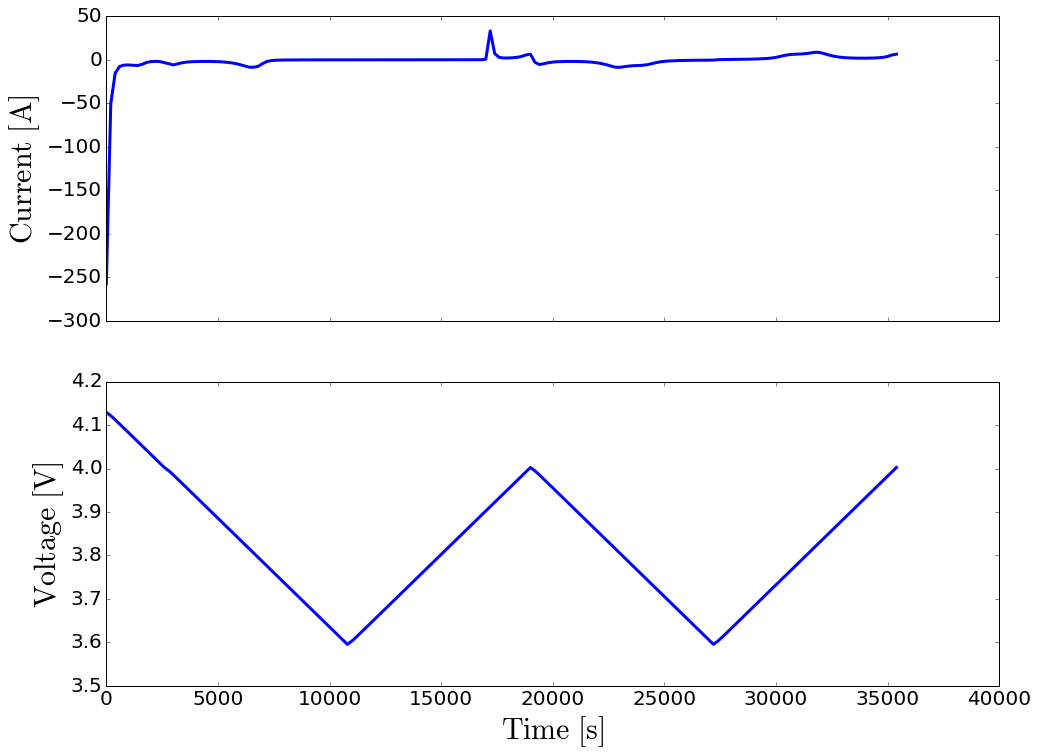

In [95]:
plot_data(data)

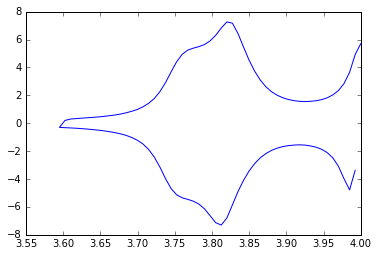

In [59]:
# variable to count the number of steps per cycle
# used to print only one cycle
cycle = int(2*((v1-(v2-step_size)) / step_size))
# print only last cycle
y = data['current'][-cycle:]
x = data['voltage'][-cycle:]
pyplot.plot(x, y)

In [60]:
with open('data_dumps/stacked_voltammetry1.dat', 'wb') as fout:
    dump(data, fout)

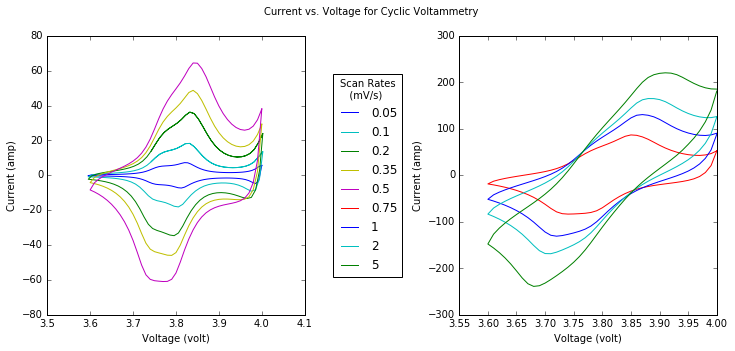

In [142]:
fig, ax = pyplot.subplots(ncols=2, figsize=(12, 5))
fig.suptitle('Current vs. Voltage for Cyclic Voltammetry')
lines = []
# list of color maps
cm = ['b', 'c', 'g', 'y', 'm', 'r', 'b', 'c', 'g']

for i in range (1, 10):
    # get each dumped data and then plot it
    dumped_data = load(open('data_dumps/stacked_voltammetry%i.dat' %(i), 'rb'))
    
    # variable to help print only the last cycle
    # smaller scans would not accept the same step size as the rest,
    #     so it's cycle number is different
    if i < 4:
        cycle = 108
    else:
        cycle = 80

    # print only last cycle
    x = dumped_data['voltage'][-cycle-1:]
    y = dumped_data['current'][-cycle-1:]
    
    if i < 6:
        p = 0
    else:
        p = 1
    ax[p].set_xlabel('Voltage (volt)')
    ax[p].set_ylabel('Current (amp)')
    ax[p].set_xbound(3.5, 4.1)
    line = ax[p].plot(x, y, cm[i-1])
    lines.extend(line)

lines = tuple(lines)
fig.legend(lines, ('0.05', '0.1', '0.2', '0.35', '0.5', '0.75', '1', '2', '5'),
           loc=10, title='Scan Rates\n   (mV/s)')
fig.subplots_adjust(wspace = 0.6)

In [143]:
tmp = ax[1]
tmp.set_ybound?